# <span style="color:#FF8888;">AraBERT Model using <span style="color: #1E90FF;"> Semantic</span> and <span style="color: #1E90FF;">Statistical</span> Features </span>

# üì• Install Libraries

In [1]:
!pip install transformers
!pip install torch
!pip install rouge

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 3.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 56.3/56.3 MB 3.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 127.9/127.9 MB 11.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

# üìö Import Libraries

In [2]:
import os
import re
import json
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from collections import Counter, defaultdict
from typing import Dict, List, Tuple, Any, Optional
from scipy.stats import entropy
import torch
from sklearn.preprocessing import normalize
from transformers import AutoTokenizer, AutoModel
import torch.nn.functional as F
import glob
from nltk.util import ngrams
from tqdm import tqdm
from rouge import Rouge

# ‚öôÔ∏è Settings

In [3]:
representation_technique = "AraBERT"
similarity_measure = 1 # 1 means original cosine similarity and 2 means modifed cosine similarity
with_edge_thresholding = False
edge_weight_threshold = 0.2
# 1 means Degree Centrality
# 2 means Weighted Degree Centrality (uses statistical scores)
# 3 means Enhanced Degree Centrality (uses statistical. kreyphrase and title similarity scores)
# 4 means TextRank with statistical scores as initial values
# 5 means pure TextRank * alpha + statistical score * (1 - alpha)
# 6 means pure TextRank * alpha + (statistical + keyphrase + title_sim) * (1 - alpha)
# 7 means PageRank
ranking_method = 9
alpha = 0.73
# variance_ratio or entropy_ratio or correlation or combined
alpha_method = "" # if we don't dynamic alpha then set this to ""
max_iterations = 100
with_redundancy_reduction = False
redundancy_threshold = 0.9
print_file = "file13.json"

# üìÇ Load JSON Data and Extract Sentences with Indexing

In [4]:
def load_json_file(file_path):
    """Load and parse a JSON file."""
    with open(file_path, 'r', encoding='utf-8') as f:
        return json.load(f)

def extract_sentences(data, skip_title=True):
    """Extract all sentences from the nested JSON structure.
    
    Args:
        data: The JSON data containing paragraphs and sentences
        skip_title: If True, skip paragraph 0 (title)
    
    Returns:
        A list of tuples: (sentence_text, (paragraph_idx, sentence_idx))
    """
    sentences = []
    
    # Go through all paragraphs
    for para_idx in data:
        # Skip paragraph 0 (title) if skip_title is True
        if skip_title and para_idx == '0':
            continue
            
        # Go through all sentences in the paragraph
        for sent_idx in data[para_idx]:
            if isinstance(data[para_idx][sent_idx], str):
                # Store sentence text and its indices
                sentences.append((data[para_idx][sent_idx], (para_idx, sent_idx)))
    
    return sentences

# üîç Find summaries' sizes¬∂

In [5]:
def count_sentences_in_directory(directory_path="/kaggle/input/voted-sentences"):
    """
    Loops through all files in the directory, counts sentences in each file,
    and stores results in a dictionary.
    
    Args:
        directory_path (str): Path to the directory containing the files
        
    Returns:
        dict: Dictionary with modified filenames as keys and sentence counts as values
    """
    sentence_counts = {}
    
    # List all files in the directory
    try:
        files = os.listdir(directory_path)
    except Exception as e:
        print(f"Error accessing directory: {e}")
        return {}
    
    # Filter for sum1.txt files
    sum_files = [f for f in files if f.endswith('_sum1.txt')]
    
    for filename in sum_files:
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)
        
        try:
            # Read the file content
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
                
            # Count sentences (ending with '.', '!', or '?')
            # Use regex to match sentence endings that aren't part of abbreviations or numbers
            sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s', content)
            # Remove empty items that might result from the split
            sentences = [s for s in sentences if s.strip()]
            
            # Get the sentence count
            sentence_count = len(sentences)
            
            # Extract the base filename (e.g., "file1" from "file1_sum1.txt")
            base_filename = filename.split('_')[0]
            
            # Create modified key (e.g., "file1.json")
            modified_key = f"{base_filename}.json"
            
            # Store in dictionary
            sentence_counts[modified_key] = sentence_count
            
        except Exception as e:
            print(f"Error processing file {filename}: {e}")
    
    return sentence_counts

sumaries_sizes = count_sentences_in_directory()
    
# Print results
print("Sentence counts:")
for file, count in sumaries_sizes.items():
    print(f"{file}: {count} sentences")

Sentence counts:
file129.json: 5 sentences
file99.json: 5 sentences
file78.json: 4 sentences
file59.json: 4 sentences
file31.json: 5 sentences
file134.json: 5 sentences
file88.json: 10 sentences
file63.json: 4 sentences
file85.json: 2 sentences
file46.json: 17 sentences
file89.json: 0 sentences
file33.json: 4 sentences
file15.json: 6 sentences
file44.json: 6 sentences
file138.json: 4 sentences
file111.json: 5 sentences
file1.json: 7 sentences
file132.json: 7 sentences
file4.json: 2 sentences
file118.json: 4 sentences
file91.json: 4 sentences
file39.json: 15 sentences
file41.json: 4 sentences
file57.json: 4 sentences
file62.json: 3 sentences
file146.json: 5 sentences
file56.json: 3 sentences
file120.json: 4 sentences
file49.json: 7 sentences
file153.json: 8 sentences
file6.json: 8 sentences
file94.json: 2 sentences
file150.json: 3 sentences
file145.json: 2 sentences
file81.json: 9 sentences
file101.json: 3 sentences
file137.json: 8 sentences
file126.json: 10 sentences
file74.json: 8 sen

# üìñ Compute AraBERT Embeddings

In [6]:
# Load AraBERT tokenizer and model with enhanced settings
tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv2")
model = AutoModel.from_pretrained("aubmindlab/bert-base-arabertv2", output_attentions=True, output_hidden_states=True)

def advanced_pooling(model_output, attention_mask, pooling_strategy="mean_last_2"):
    """Get better sentence embeddings using various pooling strategies."""
    if pooling_strategy == "mean":
        # Standard mean pooling
        token_embeddings = model_output.last_hidden_state
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
        sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, dim=1)
        sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
        return sum_embeddings / sum_mask
    
    elif pooling_strategy == "cls":
        # Use [CLS] token embedding
        return model_output.last_hidden_state[:, 0]
    
    elif pooling_strategy == "mean_last_2":
        # Mean pooling of last 2 layers (better semantic representation)
        last_two_layers = torch.stack([model_output.hidden_states[-1], model_output.hidden_states[-2]])
        mean_last_two = torch.mean(last_two_layers, dim=0)
        
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(mean_last_two.size()).float()
        sum_embeddings = torch.sum(mean_last_two * input_mask_expanded, dim=1)
        sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
        return sum_embeddings / sum_mask
    
    elif pooling_strategy == "weighted_layer_pool":
        # Weighted combination of different layers
        last_four_layers = torch.stack([
            model_output.hidden_states[-1],
            model_output.hidden_states[-2],
            model_output.hidden_states[-3],
            model_output.hidden_states[-4]
        ])
        
        # Weights increase for deeper layers
        layer_weights = torch.tensor([0.1, 0.2, 0.3, 0.4]).view(-1, 1, 1, 1).to(last_four_layers.device)
        weighted_sum = torch.sum(last_four_layers * layer_weights, dim=0)
        
        # Apply attention mask
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(weighted_sum.size()).float()
        sum_embeddings = torch.sum(weighted_sum * input_mask_expanded, dim=1)
        sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
        return sum_embeddings / sum_mask

def compute_arabert_embeddings(sentence_data, pooling_strategy="weighted_layer_pool"):
    """Generate improved sentence embeddings using AraBERT with advanced pooling."""
    embeddings = []
    
    for sentence_text, _ in sentence_data:
        # Tokenize and encode
        inputs = tokenizer(sentence_text, return_tensors="pt", truncation=True, max_length=768, padding=True)
        
        # Get model output with hidden states
        with torch.no_grad():
            outputs = model(**inputs)
        
        # Apply advanced pooling
        pooled_embedding = advanced_pooling(outputs, inputs['attention_mask'], pooling_strategy)
        embedding_np = pooled_embedding[0].numpy()
        embeddings.append(embedding_np)
    
    # Normalize all embeddings
    normalized_embeddings = normalize(np.array(embeddings))
    return normalized_embeddings

def compute_arabert_title_embedding(title_text, pooling_strategy="weighted_layer_pool"):
    """Generate normalized AraBERT embedding for the title using advanced pooling."""
    inputs = tokenizer(title_text, return_tensors="pt", truncation=True, padding=True)
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    pooled_embedding = advanced_pooling(outputs, inputs['attention_mask'], pooling_strategy)
    title_embedding = pooled_embedding[0].numpy()
    
    # Normalize the vector
    normalized_title_embedding = normalize(title_embedding.reshape(1, -1))[0]
    return normalized_title_embedding

tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/720k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

2025-06-11 13:20:22.839148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749648023.172869      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749648023.266796      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

# üìè Compute Similarity

In [7]:
def cosine_similarity(vec1, vec2):
    """Compute cosine similarity between two vectors."""
    return np.dot(vec1, vec2)

def modified_similarity(vec1, vec2, title_vec, keyphrase_score, alpha=0.7, beta=0.2, gamma=0.1):
    """
    Modified similarity that combines:
    - Direct sentence similarity (cosine)
    - Title relevance for both sentences
    - Keyphrase score weighting
    
    Args:
        vec1, vec2: Sentence vectors
        title_vec: Title vector
        keyphrase_score: Keyphrase score for sentence 2
        alpha, beta, gamma: Weighting parameters (should sum to 1)
    """
    # Direct similarity between sentences
    direct_sim = cosine_similarity(vec1, vec2)
    
    # Title relevance for both sentences
    title_rel1 = cosine_similarity(vec1, title_vec)
    title_rel2 = cosine_similarity(vec2, title_vec)
    title_sim = (title_rel1 + title_rel2) / 2
    
    # Combined similarity with keyphrase weighting
    return alpha * direct_sim + beta * title_sim + gamma * keyphrase_score

# üìà Build the Graph

In [8]:

def build_graph(sentence_data, title_text, scores):
    """
    Build a graph where nodes are sentences and edges represent modified similarity above a threshold.
    Uses enhanced AraBERT representation with advanced pooling strategies.
    
    Args:
        sentence_data: List of tuples (sentence_text, (para_idx, sent_idx))
        title_text: The text of the document title
        keyphrase_scores: Dictionary of keyphrase scores by paragraph and sentence indices
    
    Returns:
        Tuple of (graph, arabert_vectors)
    """
    # Compute enhanced AraBERT embeddings
    arabert_vectors = compute_arabert_embeddings(sentence_data)
    
    # Create graph
    G = nx.Graph()
    
    # Add nodes (sentences) with their indices
    for i, (sentence_text, (para_idx, sent_idx)) in enumerate(sentence_data):
        node_id = f"{para_idx}_{sent_idx}"
        
        # Get keyphrase score for this sentence (default to 0 if not found)
        keyphrase_score = 0
        statistical_score = 0
        if para_idx in scores and sent_idx in scores[para_idx]:
            keyphrase_score = scores[para_idx][sent_idx].get('keyphrase_score', 0)
            statistical_score = scores[para_idx][sent_idx].get('statistical_score', 0)
        
        # Calculate title relevance for each sentence
        title_vector = compute_arabert_title_embedding(title_text)
        title_similarity = cosine_similarity(arabert_vectors[i], title_vector)
        
        # Add node with enhanced attributes
        G.add_node(
            node_id, 
            text=sentence_text, 
            para_idx=para_idx, 
            sent_idx=sent_idx, 
            vector_idx=i,
            keyphrase_score=keyphrase_score,
            statistical_score=statistical_score,
            title_similarity=title_similarity
        )
    
    # Calculate similarities for all pairs
    similarities = []
    sentence_pairs = []
    
    for i, (_, (para_i, sent_i)) in enumerate(sentence_data):
        node_i = f"{para_i}_{sent_i}"
        keyphrase_score_i = G.nodes[node_i]['keyphrase_score']
        
        for j, (_, (para_j, sent_j)) in enumerate(sentence_data[i+1:], i+1):
            node_j = f"{para_j}_{sent_j}"
            keyphrase_score_j = G.nodes[node_j]['keyphrase_score']
            
            # Calculate position-based weight (closer sentences should have higher relatedness)
            position_weight = 1.0 / (1.0 + abs(j - i))
            
            # Use modified similarity based on the selected measure
            if similarity_measure == 2:
                similarity = modified_similarity(
                    arabert_vectors[i], 
                    arabert_vectors[j], 
                    title_vector,
                    keyphrase_score_j
                )
                # Incorporate position information
                similarity = 0.8 * similarity + 0.2 * position_weight
            else:
                similarity = cosine_similarity(
                    arabert_vectors[i], 
                    arabert_vectors[j]
                )
            
            similarities.append(similarity)
            sentence_pairs.append((node_i, node_j))
    
    # Normalize similarities if there are any
    if similarities:
        min_sim = min(similarities)
        max_sim = max(similarities)
        
        # Avoid division by zero if all similarities are the same
        if max_sim > min_sim:
            normalized_similarities = [(sim - min_sim) / (max_sim - min_sim) for sim in similarities]
        else:
            normalized_similarities = [1.0 for _ in similarities]
        
        # Add edges based on normalized similarities
        for (node_i, node_j), norm_sim in zip(sentence_pairs, normalized_similarities):
            if with_edge_thresholding:
                if norm_sim > edge_weight_threshold:
                    G.add_edge(node_i, node_j, weight=norm_sim)
            else:
                G.add_edge(node_i, node_j, weight=norm_sim)
    
    return G, arabert_vectors

# üëÄ Visualize Graph

In [9]:
def visualize_graph(G, filename=print_file):
    """Visualize the graph and display in the console."""
    plt.figure(figsize=(12, 10))
    
    # Use spring layout for better visualization
    pos = nx.spring_layout(G, seed=42)
    
    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')
    
    # Get edge weights for line thickness and color
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    
    # Draw edges with varying thickness based on weight
    nx.draw_networkx_edges(G, pos, width=[w*3 for w in edge_weights], alpha=0.7)
    
    # Draw node labels
    node_labels = {node: f"{data['para_idx']}_{data['sent_idx']}" for node, data in G.nodes(data=True)}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)
    
    plt.title(f"Sentence Similarity Graph for {filename if filename else 'Sample'}")
    plt.axis('off')
        
    # Instead of saving, just display the plot
    plt.show()

# üõ†Ô∏è All Graph Construction Stage

 14%|‚ñà‚ñç        | 22/153 [00:58<06:43,  3.08s/it]

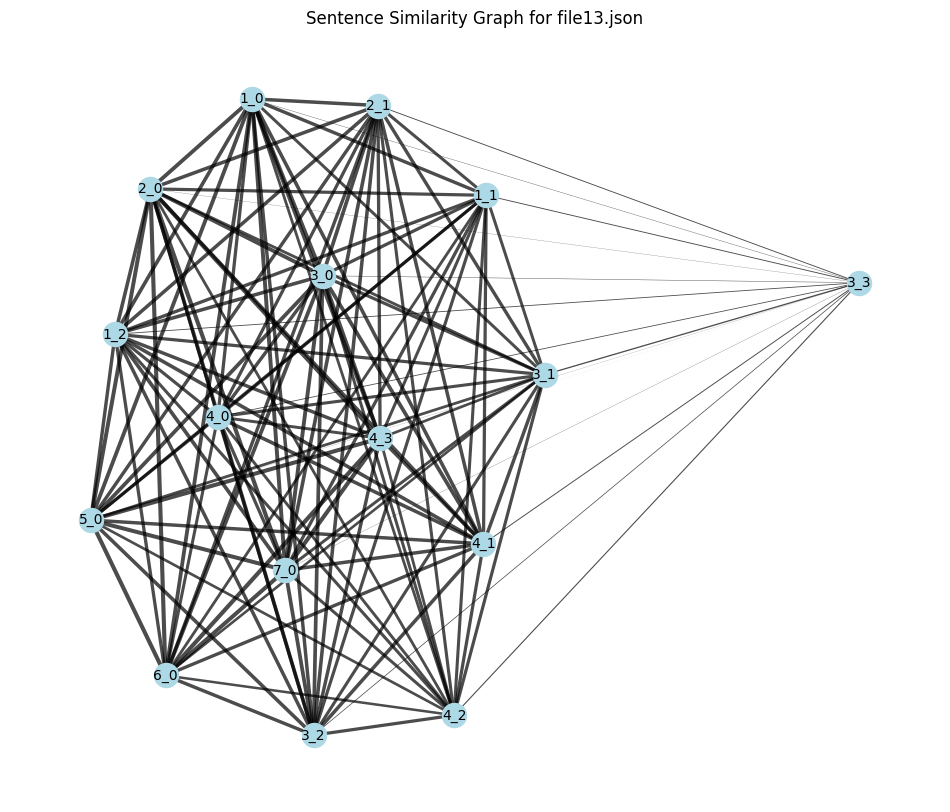

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 153/153 [07:27<00:00,  2.92s/it]

Successfully processed 153 files.


In [10]:
def process_file(file_path, scores_folder):
    """
    Process a single JSON file and return the results with enhanced similarity measures.
    
    Args:
        file_path: Path to the JSON file to process
        scores_folder: Path to the folder containing sentence scores
    
    Returns:
        Dictionary with processing results or None if processing failed
    """
    filename = os.path.basename(file_path)
    
    # Load document data
    data = load_json_file(file_path)
    
    # Load sentence scores
    scores_path = os.path.join(scores_folder, filename)
    keyphrase_scores = {}
    if os.path.exists(scores_path):
        keyphrase_scores = load_json_file(scores_path)
    
    # Extract the title
    title_text = ""
    if '0' in data and '0' in data['0']:
        title_text = data['0']['0']
    
    # Extract sentences (skipping title)
    sentence_data = extract_sentences(data, skip_title=True)
    
    if not sentence_data:
        print(f"No sentences found in {filename} after skipping title.")
        return None
    
    # Build graph with title and keyphrase scores
    graph, vectors = build_graph(
        sentence_data, 
        title_text, 
        keyphrase_scores, 
    )

    if filename == print_file:
        visualize_graph(graph)
    
    return {
        'graph': graph,
        'vectors': vectors,
        'sentences': sentence_data,
        'title': title_text,
        'keyphrase_scores': keyphrase_scores,
        'filename': filename
    }

def process_all_files(folder_path, scores_folder):
    """
    Process all JSON files in the given folder with keyphrase scores.
    
    Args:
        folder_path: Path to the folder containing document JSON files
        scores_folder: Path to the folder containing sentence scores
        
    Returns:
        Dictionary of processing results by filename
    """
    results = {}
    
    # Get all JSON files in the folder
    file_paths = glob.glob(os.path.join(folder_path, "*.json"))
    
    for file_path in tqdm(file_paths):
        result = process_file(file_path, scores_folder)
        if result:
            results[result['filename']] = result
    
    return results


# Example usage
if __name__ == "__main__":
    documents_folder = "/kaggle/input/graduation-project/preprocessed_dl"
    scores_folder = "/kaggle/input/graduation-project/sentence_scores"
    
    results = process_all_files(documents_folder, scores_folder)
    
    print(f"Successfully processed {len(results)} files.")

# üèÜ Ranking

## üï∏Ô∏è Standared Degree Centrality

In [11]:
def standard_degree_centrality(results):
    """
    Rank sentences in each file by standard degree centrality.
    
    Args:
        results: Dictionary of results from process_all_files function
        
    Returns:
        Dictionary with filename as key and list of (sentence_id, score, text) tuples as value,
        sorted by score in descending order
    """
    rankings = {}
    
    for filename, result in results.items():
        graph = result['graph']
        
        # Calculate standard degree centrality for each node
        centrality_scores = {}
        
        for node_id in graph.nodes():
            # Standard degree centrality: sum of edge weights
            centrality_score = sum(graph[node_id][neighbor]['weight'] 
                                 for neighbor in graph.neighbors(node_id))
            centrality_scores[node_id] = centrality_score
        
        # Create a list of (sentence_id, score, text) tuples
        sentence_scores = []
        for node_id, score in centrality_scores.items():
            node_data = graph.nodes[node_id]
            text = node_data['text']
            sentence_scores.append((node_id, score, text))
        
        # Sort by score in descending order
        sentence_scores.sort(key=lambda x: x[1], reverse=True)
        
        # Store rankings
        rankings[filename] = sentence_scores
    
    return rankings

## üìäüï∏Ô∏è Weighted Degree Centrality

In [12]:
def weighted_centrality(results: Dict[str, Any], 
                       normalization: str = 'minmax',
                       alpha: float = 0.5,
                       use_statistical_scores: bool = True) -> Dict[str, List[Tuple[str, float, str]]]:
    """
    Rank sentences in each file by weighted degree centrality.
    
    Args:
        results: Dictionary of results from process_all_files function
        normalization: Normalization method ('minmax', 'zscore', 'none')
        alpha: Weight balance between centrality and statistical influence (0-1)
        use_statistical_scores: Whether to use statistical scores in weighting
        
    Returns:
        Dictionary with filename as key and list of (sentence_id, score, text) tuples as value,
        sorted by score in descending order
    """
    rankings = {}
    
    for filename, result in results.items():
        graph = result['graph']
        
        # Calculate weighted centrality scores
        centrality_scores = _calculate_weighted_centrality(graph, use_statistical_scores)
        
        # Normalize scores if requested
        if normalization != 'none':
            centrality_scores = _normalize_scores(centrality_scores, method=normalization)
        
        # Create a list of (sentence_id, score, text) tuples
        sentence_scores = []
        for node_id, score in centrality_scores.items():
            node_data = graph.nodes[node_id]
            text = node_data['text']
            sentence_scores.append((node_id, score, text))
        
        # Sort by score in descending order
        sentence_scores.sort(key=lambda x: x[1], reverse=True)
        rankings[filename] = sentence_scores
    
    return rankings

def _calculate_weighted_centrality(graph, use_statistical_scores: bool = True) -> Dict[str, float]:
    """
    Calculate weighted centrality using neighbor statistical scores stored in node attributes.
    
    Args:
        graph: NetworkX graph with nodes containing statistical_score attribute
        use_statistical_scores: Whether to weight by statistical scores or use simple centrality
    
    Returns:
        Dictionary mapping node_id to centrality score
    """
    centrality_scores = {}
    
    for node_id in graph.nodes():
        centrality_score = 0
        
        # Iterate through all neighbors of the node
        for neighbor in graph.neighbors(node_id):
            # Get the similarity (edge weight) between the node and its neighbor
            edge_weight = graph[node_id][neighbor]['weight']
            
            if use_statistical_scores:
                # Get the statistical score for the neighbor from node attributes
                neighbor_stat_score = graph.nodes[neighbor].get('statistical_score', 0)
                
                # Weight the edge by neighbor's statistical importance
                contribution = edge_weight * (1 + neighbor_stat_score)
            else:
                # Simple weighted degree centrality
                contribution = edge_weight
            
            centrality_score += contribution
        
        centrality_scores[node_id] = centrality_score
    
    return centrality_scores

def _normalize_scores(scores: Dict[str, float], method: str = 'minmax') -> Dict[str, float]:
    """Normalize scores using specified method."""
    if not scores:
        return scores
    
    values = list(scores.values())
    
    if method == 'minmax':
        min_val, max_val = min(values), max(values)
        if max_val == min_val:
            return {k: 0.5 for k in scores.keys()}
        return {k: (v - min_val) / (max_val - min_val) for k, v in scores.items()}
    
    elif method == 'zscore':
        mean_val = np.mean(values)
        std_val = np.std(values)
        if std_val == 0:
            return {k: 0 for k in scores.keys()}
        return {k: (v - mean_val) / std_val for k, v in scores.items()}
    
    return scores

def enhanced_weighted_centrality(results: Dict[str, Any], 
                               combination_method: str = 'multiplicative',
                               normalization: str = 'minmax') -> Dict[str, List[Tuple[str, float, str]]]:
    """
    Enhanced version that combines multiple node attributes for centrality calculation.
    
    Args:
        results: Dictionary of results from process_all_files function
        combination_method: How to combine scores ('additive', 'multiplicative', 'weighted_sum')
        normalization: Normalization method ('minmax', 'zscore', 'none')
        
    Returns:
        Dictionary with filename as key and list of (sentence_id, score, text) tuples as value
    """
    rankings = {}
    
    for filename, result in results.items():
        graph = result['graph']
        
        # Calculate enhanced centrality scores
        centrality_scores = _calculate_enhanced_centrality(graph, combination_method)
        
        # Normalize scores if requested
        if normalization != 'none':
            centrality_scores = _normalize_scores(centrality_scores, method=normalization)
        
        # Create and sort sentence scores
        sentence_scores = []
        for node_id, score in centrality_scores.items():
            node_data = graph.nodes[node_id]
            text = node_data['text']
            sentence_scores.append((node_id, score, text))
        
        sentence_scores.sort(key=lambda x: x[1], reverse=True)
        rankings[filename] = sentence_scores
    
    return rankings

def _calculate_enhanced_centrality(graph, combination_method: str = 'multiplicative') -> Dict[str, float]:
    """
    Calculate enhanced centrality using multiple node attributes.
    
    Combines:
    - Edge weights (similarity)
    - Neighbor statistical scores
    - Neighbor keyphrase scores
    - Neighbor title similarity
    """
    centrality_scores = {}
    
    for node_id in graph.nodes():
        centrality_score = 0
        
        for neighbor in graph.neighbors(node_id):
            edge_weight = graph[node_id][neighbor]['weight']
            neighbor_data = graph.nodes[neighbor]
            
            # Get neighbor attributes with defaults
            stat_score = neighbor_data.get('statistical_score', 0)
            keyphrase_score = neighbor_data.get('keyphrase_score', 0)
            title_sim = neighbor_data.get('title_similarity', 0)
            
            # Combine scores based on method
            if combination_method == 'additive':
                neighbor_importance = stat_score + keyphrase_score + title_sim
            elif combination_method == 'multiplicative':
                # Add 1 to avoid zero multiplication
                neighbor_importance = (1 + stat_score) * (1 + keyphrase_score) * (1 + title_sim)
            elif combination_method == 'weighted_sum':
                # Weighted combination (you can adjust weights)
                neighbor_importance = (0.5 * stat_score + 0.3 * keyphrase_score + 0.2 * title_sim)
            else:
                neighbor_importance = stat_score  # Default to statistical score only
            
            contribution = edge_weight * neighbor_importance
            centrality_score += contribution
        
        centrality_scores[node_id] = centrality_score
    
    return centrality_scores

# Utility functions for analysis
def analyze_centrality_distribution(rankings: Dict[str, List[Tuple[str, float, str]]]) -> Dict[str, Dict]:
    """Analyze the distribution of centrality scores across files."""
    analysis = {}
    
    for filename, sentence_scores in rankings.items():
        scores = [score for _, score, _ in sentence_scores]
        
        analysis[filename] = {
            'mean': np.mean(scores) if scores else 0,
            'std': np.std(scores) if scores else 0,
            'min': min(scores) if scores else 0,
            'max': max(scores) if scores else 0,
            'median': np.median(scores) if scores else 0,
            'top_10_percent_threshold': np.percentile(scores, 90) if scores else 0,
            'num_sentences': len(scores)
        }
    
    return analysis

## üîß Compute Adaptive Alpha

In [13]:
def calculate_adaptive_alpha(normalized_textrank, normalized_other,method, min_alpha=0.1, max_alpha=0.9):
    """
    Calculate an adaptive alpha value based on the quality and distribution of TextRank vs other scores.
    
    Args:
        normalized_textrank: Array of normalized TextRank scores
        normalized_other: Array of normalized other feature scores
        method: Method to use for alpha calculation
                'variance_ratio' - Based on relative variance (default)
                'entropy_ratio' - Based on information entropy
                'correlation' - Based on negative correlation
                'combined' - Weighted combination of multiple metrics
        min_alpha: Minimum allowed alpha value (default=0.1)
        max_alpha: Maximum allowed alpha value (default=0.9)
    
    Returns:
        float: Adaptive alpha value between min_alpha and max_alpha
    """
    
    if len(normalized_textrank) != len(normalized_other):
        raise ValueError("TextRank and other scores must have the same length")
    
    if len(normalized_textrank) == 0:
        return 0.5  # Default for empty arrays
    
    if method == 'variance_ratio':
        return _alpha_by_variance_ratio(normalized_textrank, normalized_other, min_alpha, max_alpha)
    
    elif method == 'entropy_ratio':
        return _alpha_by_entropy_ratio(normalized_textrank, normalized_other, min_alpha, max_alpha)
    
    elif method == 'correlation':
        return _alpha_by_correlation(normalized_textrank, normalized_other, min_alpha, max_alpha)
    
    elif method == 'combined':
        return _alpha_by_combined_metrics(normalized_textrank, normalized_other, min_alpha, max_alpha)
    
    else:
        raise ValueError(f"Unknown method: {method}")


def _alpha_by_variance_ratio(textrank_scores, other_scores, min_alpha, max_alpha):
    """
    Calculate alpha based on variance ratio.
    Higher variance indicates more discriminative power.
    """
    var_textrank = np.var(textrank_scores)
    var_other = np.var(other_scores)
    
    # Avoid division by zero
    total_var = var_textrank + var_other
    if total_var < 1e-10:
        return 0.5
    
    # Alpha proportional to TextRank's relative variance
    alpha = var_textrank / total_var
    return np.clip(alpha, min_alpha, max_alpha)


def _alpha_by_entropy_ratio(textrank_scores, other_scores, min_alpha, max_alpha):
    """
    Calculate alpha based on entropy ratio.
    Higher entropy indicates more information content.
    """
    # Convert scores to probability distributions
    textrank_probs = textrank_scores / (np.sum(textrank_scores) + 1e-10)
    other_probs = other_scores / (np.sum(other_scores) + 1e-10)
    
    # Calculate entropy (add small epsilon to avoid log(0))
    entropy_textrank = entropy(textrank_probs + 1e-10)
    entropy_other = entropy(other_probs + 1e-10)
    
    total_entropy = entropy_textrank + entropy_other
    if total_entropy < 1e-10:
        return 0.5
    
    # Alpha proportional to TextRank's relative entropy
    alpha = entropy_textrank / total_entropy
    return np.clip(alpha, min_alpha, max_alpha)


def _alpha_by_correlation(textrank_scores, other_scores, min_alpha, max_alpha):
    """
    Calculate alpha based on negative correlation.
    If scores are highly correlated, balance them equally.
    If uncorrelated, favor the one with higher variance.
    """
    if len(textrank_scores) < 2:
        return 0.5
    
    # Calculate correlation coefficient
    correlation = np.corrcoef(textrank_scores, other_scores)[0, 1]
    
    # Handle NaN correlation (constant arrays)
    if np.isnan(correlation):
        correlation = 1.0
    
    # Convert correlation to alpha
    # High correlation (close to 1) -> alpha closer to 0.5
    # Low correlation (close to 0) -> favor higher variance method
    correlation_factor = abs(correlation)
    
    if correlation_factor > 0.8:  # Highly correlated
        alpha = 0.5
    else:
        # Use variance ratio for uncorrelated scores
        var_textrank = np.var(textrank_scores)
        var_other = np.var(other_scores)
        total_var = var_textrank + var_other
        
        if total_var < 1e-10:
            alpha = 0.5
        else:
            alpha = var_textrank / total_var
            # Adjust based on correlation - less correlated means more trust in variance
            alpha = 0.5 + (alpha - 0.5) * (1 - correlation_factor)
    
    return np.clip(alpha, min_alpha, max_alpha)


def _alpha_by_combined_metrics(textrank_scores, other_scores, min_alpha, max_alpha):
    """
    Calculate alpha using a weighted combination of multiple metrics.
    """
    # Get individual alphas
    alpha_var = _alpha_by_variance_ratio(textrank_scores, other_scores, 0, 1)
    alpha_entropy = _alpha_by_entropy_ratio(textrank_scores, other_scores, 0, 1)
    alpha_corr = _alpha_by_correlation(textrank_scores, other_scores, 0, 1)
    
    # Weighted combination (you can adjust these weights)
    weights = [0.4, 0.3, 0.3]  # [variance, entropy, correlation]
    alpha = (weights[0] * alpha_var + 
             weights[1] * alpha_entropy + 
             weights[2] * alpha_corr)
    
    return np.clip(alpha, min_alpha, max_alpha)


# Helper function to analyze score quality for debugging
def analyze_score_quality(textrank_scores, other_scores, filename):
    """
    Analyze the quality metrics of both score sets for debugging purposes.
    """
    print(f"\n--- Score Analysis for {filename} ---")
    print(f"TextRank - Mean: {np.mean(textrank_scores):.4f}, Var: {np.var(textrank_scores):.4f}")
    print(f"Other    - Mean: {np.mean(other_scores):.4f}, Var: {np.var(other_scores):.4f}")
    
    if len(textrank_scores) > 1:
        correlation = np.corrcoef(textrank_scores, other_scores)[0, 1]
        if not np.isnan(correlation):
            print(f"Correlation: {correlation:.4f}")
    
    # Calculate adaptive alphas for different methods
    methods = ['variance_ratio', 'entropy_ratio', 'correlation', 'combined']
    for method in methods:
        alpha = calculate_adaptive_alpha(textrank_scores, other_scores, method=method)
        print(f"Alpha ({method}): {alpha:.4f}")

## üß†üîó Standard TextRank

In [14]:
# Global variable to store L1 norm values for the print_file
textrank_l1_norms = []

def standard_TextRank(results, damping=0.85, tolerance=1e-6):
    """
    Implements TextRank algorithm for sentence ranking using the standard formula:
    S(Vi) = (1-d) + d * sum(wij * S(Vj) / |Out(Vj)|) for all j in In(Vi)
    
    Args:
        results: Dictionary of processing results by filename
        damping: Damping factor for TextRank (default=0.85)
        max_iterations: Maximum number of iterations (default=100)
        tolerance: Convergence tolerance (default=1e-6)
        
    Returns:
        Dictionary of rankings by filename
    """
    global textrank_l1_norms
    rankings = {}
    convergence_data = {}
    
    # Reset L1 norms list at the beginning
    textrank_l1_norms = []
    
    for filename, result in results.items():
        graph = result['graph']
        sentences = result['sentences']
        
        nodes = list(graph.nodes())
        node_to_idx = {node: i for i, node in enumerate(nodes)}
        n = len(nodes)
        
        if n == 0:
            rankings[filename] = []
            continue
            
        # Initialize all scores to 1/N (uniform distribution)
        scores = np.ones(n) / n
        
        # Check if this is the file we want to track L1 norms for
        track_l1_norms = filename == print_file
        
        # Precompute outgoing degree for each node
        out_degrees = {}
        for node in nodes:
            out_degree = len(list(graph.neighbors(node)))
            out_degrees[node] = max(out_degree, 1)  # Avoid division by zero
        
        # Run TextRank iterations using the exact formula
        converged = False
        for iteration in range(1, max_iterations + 1):
            new_scores = np.zeros(n)
            
            for i, node_i in enumerate(nodes):
                # S(Vi) = (1-d) + d * sum(wij * S(Vj) / |Out(Vj)|)
                new_scores[i] = (1 - damping)
                
                # Sum over all nodes j that have edges TO node_i (In(Vi))
                for node_j in nodes:
                    if graph.has_edge(node_j, node_i):  # j -> i (j is in In(Vi))
                        j = node_to_idx[node_j]
                        wij = graph[node_j][node_i]['weight']  # weight from j to i
                        out_vj = out_degrees[node_j]  # |Out(Vj)|
                        
                        new_scores[i] += damping * (wij * scores[j]) / out_vj
            
            # Calculate L1 norm for the specific file
            if track_l1_norms:
                l1_norm = np.sum(np.abs(new_scores - scores))
                textrank_l1_norms.append(l1_norm)
            
            # Check for convergence - ALL sentences must have converged
            # np.allclose checks that ALL values are close within tolerance
            if np.allclose(scores, new_scores, atol=tolerance):
                print(f"‚úÖ Converged after {iteration} iterations for file: {filename}")
                converged = True
                scores = new_scores
                break
                
            scores = new_scores
        
        if not converged:
            print(f"‚ö†Ô∏è Warning: TextRank did NOT converge after {max_iterations} iterations for file: {filename}")
        
        # Normalize final scores for ranking
        if np.max(scores) > np.min(scores):
            normalized_scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))
        else:
            normalized_scores = np.ones(n) / n
            
        # For debugging - can be removed for production
        if filename == print_file:
            for i, node in enumerate(nodes):
                node_data = graph.nodes[node]
                para_idx = node_data['para_idx']
                sent_idx = node_data['sent_idx']
                print(f"  Sentence [{para_idx}][{sent_idx}]:")
                print(f"    TextRank score:   {normalized_scores[i]:.4f}")
        
        # Store results
        sentence_scores = [
            (node, float(normalized_scores[i]), graph.nodes[node]['text']) 
            for i, node in enumerate(nodes)
        ]
        sentence_scores.sort(key=lambda x: x[1], reverse=True)
        rankings[filename] = sentence_scores
    
    return rankings

## LexRank üîóüìÑ

In [15]:
# Global variable to store L1 norm values for the print_file
lexrank_l1_norms = []

def LexRank(results, damping=0.85, tolerance=1e-6, max_iterations=100):
    """
    Implements LexRank algorithm for sentence ranking using the original formula:
    S(Vi) = d/N + (1-d) * sum(sim(Vi,Vj) / sum(sim(Vj,Vk)) * S(Vj)) for all j in In(Vi)
    
    Following the original LexRank paper where self-similarity is excluded from denominator.
    
    Args:
        results: Dictionary of processing results by filename
        damping: Damping factor for LexRank (default=0.85)
        tolerance: Convergence tolerance (default=1e-6)
        max_iterations: Maximum number of iterations (default=100)
        
    Returns:
        Dictionary of rankings by filename
    """
    global lexrank_l1_norms
    rankings = {}
    
    # Reset L1 norms list at the beginning
    lexrank_l1_norms = []
    
    for filename, result in results.items():
        graph = result['graph']
        sentences = result['sentences']
        
        nodes = list(graph.nodes())
        node_to_idx = {node: i for i, node in enumerate(nodes)}
        n = len(nodes)
        
        if n == 0:
            rankings[filename] = []
            continue
            
        # Initialize all scores to 1/N (uniform distribution)
        scores = np.ones(n) / n
        
        # Check if this is the file we want to track L1 norms for
        track_l1_norms = 'print_file' in globals() and filename == globals().get('print_file')
        
        # Precompute similarity sums for each node (denominator in the formula)
        # Following original LexRank: exclude self-similarity from denominator
        sim_sums = {}
        for node_j in nodes:
            sim_sum = 0
            for node_k in nodes:
                if node_j != node_k and graph.has_edge(node_j, node_k):
                    # Use the weight as similarity (assuming it's cosine similarity)
                    sim_sum += graph[node_j][node_k]['weight']
            sim_sums[node_j] = max(sim_sum, 1e-10)  # Avoid division by zero
        
        # Run LexRank iterations using the exact original formula
        converged = False
        for iteration in range(1, max_iterations + 1):
            new_scores = np.zeros(n)
            
            for i, node_i in enumerate(nodes):
                # S(Vi) = d/N + (1-d) * sum(sim(Vi,Vj) / sum(sim(Vj,Vk)) * S(Vj))
                new_scores[i] = damping / n
                
                # Sum over all nodes j that have edges TO node_i (In(Vi))
                similarity_weighted_sum = 0
                for node_j in nodes:
                    j = node_to_idx[node_j]
                    
                    if node_i == node_j:
                        # Self-similarity case: sim(Vi,Vi) = 1.0
                        # But denominator excludes self-similarity (original LexRank)
                        sim_vi_vj = 1.0
                        sim_sum_vj = sim_sums[node_j]
                        similarity_weighted_sum += (sim_vi_vj / sim_sum_vj) * scores[j]
                        
                    elif graph.has_edge(node_j, node_i):  # j -> i (j is in In(Vi))
                        sim_vi_vj = graph[node_j][node_i]['weight']  # similarity between Vi and Vj
                        sim_sum_vj = sim_sums[node_j]  # sum of similarities from Vj to all nodes (excluding self)
                        similarity_weighted_sum += (sim_vi_vj / sim_sum_vj) * scores[j]
                
                new_scores[i] += (1 - damping) * similarity_weighted_sum
            
            # Calculate L1 norm for the specific file
            if track_l1_norms:
                l1_norm = np.sum(np.abs(new_scores - scores))
                lexrank_l1_norms.append(l1_norm)
            
            # Check for convergence - ALL sentences must have converged
            if np.allclose(scores, new_scores, atol=tolerance):
                print(f"‚úÖ Converged after {iteration} iterations for file: {filename}")
                converged = True
                scores = new_scores
                break
                
            scores = new_scores
        
        if not converged:
            print(f"‚ö†Ô∏è Warning: LexRank did NOT converge after {max_iterations} iterations for file: {filename}")
        
        # Normalize final scores for ranking
        if np.max(scores) > np.min(scores):
            normalized_scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))
        else:
            normalized_scores = np.ones(n) / n
            
        # For debugging - can be removed for production
        if track_l1_norms:
            for i, node in enumerate(nodes):
                node_data = graph.nodes[node]
                para_idx = node_data['para_idx']
                sent_idx = node_data['sent_idx']
                print(f"  Sentence [{para_idx}][{sent_idx}]:")
                print(f"    LexRank score:   {normalized_scores[i]:.4f}")
        
        # Store results
        sentence_scores = [
            (node, float(normalized_scores[i]), graph.nodes[node]['text']) 
            for i, node in enumerate(nodes)
        ]
        sentence_scores.sort(key=lambda x: x[1], reverse=True)
        rankings[filename] = sentence_scores
    
    return rankings

## üìä Statistical TextRank
### This function uses TextRank with initial scores = lenght + pos + cue + nuarical

In [16]:
statistical_textrank_l1_norms = []
def statistical_TextRank(results, damping=0.85, max_iterations=100):
    """
    Implements TextRank algorithm for sentence ranking where:
    1. Initial scores are based on statistical scores of sentences
    2. Final scores are pure TextRank scores (no weighted combination)
    
    Args:
        results: Dictionary of processing results by filename
        damping: Damping factor for TextRank (default=0.85)
        max_iterations: Maximum number of iterations (default=100)
        
    Returns:
        Dictionary of rankings by filename
    """
    global statistical_textrank_l1_norms
    rankings = {}
    scores_dir = "/kaggle/input/graduation-project/sentence_scores"
    
    # Reset L1 norms list at the beginning
    statistical_textrank_l1_norms = []
    
    for filename, result in results.items():
        graph = result['graph']
        sentences = result['sentences']
        
        base_filename = os.path.splitext(os.path.basename(filename))[0]
        scores_path = os.path.join(scores_dir, f"{base_filename}.json")
        
        try:
            statistical_scores = load_json_file(scores_path)
        except FileNotFoundError:
            print(f"Warning: Statistical scores file not found for {filename}. Using default scores.")
            statistical_scores = {}
            
        nodes = list(graph.nodes())
        node_to_idx = {node: i for i, node in enumerate(nodes)}
        n = len(nodes)
        
        if n == 0:
            rankings[filename] = []
            continue
            
        # Check if this is the file we want to track L1 norms for
        track_l1_norms = 'print_file' in globals() and filename == globals().get('print_file')
            
        # Initialize TextRank scores with statistical scores (as you wanted)
        scores = np.zeros(n)
        for i, node in enumerate(nodes):
            node_data = graph.nodes[node]
            para_idx = node_data['para_idx']
            sent_idx = node_data['sent_idx']
            stat_score = statistical_scores.get(str(para_idx), {}).get(str(sent_idx), {}).get('statistical_score', 0)
            scores[i] = max(stat_score, 0.01)  # Ensure minimum score of 0.01 to avoid zeros
            
        # Normalize initial scores to sum to 1
        scores = scores / np.sum(scores)
        
        # Precompute outgoing weights for each node
        out_weights = {}
        for node in nodes:
            out_sum = sum(graph[node][nbr]['weight'] for nbr in graph.neighbors(node))
            out_weights[node] = max(out_sum, 1e-10)  # Avoid division by zero
        
        # Run TextRank iterations
        converged = False
        for iteration in range(1, max_iterations + 1):
            new_scores = np.ones(n) * (1 - damping) / n
            
            for i, node_i in enumerate(nodes):
                score_sum = 0
                # Iterate over all nodes that have edges TO node_i (incoming edges)
                for j, node_j in enumerate(nodes):
                    if graph.has_edge(node_j, node_i):  # If there's an edge from node_j to node_i
                        weight = graph[node_j][node_i]['weight']
                        score_sum += (weight * scores[j]) / out_weights[node_j]
                
                new_scores[i] += damping * score_sum
            
            # Calculate L1 norm for convergence check
            l1_norm = np.sum(np.abs(new_scores - scores))
            
            # Track L1 norms for the specific file if needed
            if track_l1_norms:
                statistical_textrank_l1_norms.append(l1_norm)
                
            # Check for convergence with a reasonable threshold
            if l1_norm < 1e-6:
                print(f"‚úÖ Converged after {iteration} iterations for file: {filename}")
                converged = True
                scores = new_scores
                break
                
            scores = new_scores
        
        if not converged:
            print(f"‚ö†Ô∏è Warning: TextRank did NOT converge after {max_iterations} iterations for file: {filename}")

        # Normalize final scores
        if np.max(scores) > np.min(scores):
            normalized_scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))
        else:
            normalized_scores = np.ones(n) / n
            
        # For debugging - can be removed for production
        if track_l1_norms:
            for i, node in enumerate(nodes):
                node_data = graph.nodes[node]
                para_idx = node_data['para_idx']
                sent_idx = node_data['sent_idx']
                stat_score = statistical_scores.get(str(para_idx), {}).get(str(sent_idx), {}).get('statistical_score', 0)
                print(f"  Sentence [{para_idx}][{sent_idx}]:")
                print(f"    Initial stat score:  {stat_score:.4f}")
                print(f"    Final TextRank score: {normalized_scores[i]:.4f}")
        
        # Store results
        sentence_scores = [
            (node, float(normalized_scores[i]), graph.nodes[node]['text']) 
            for i, node in enumerate(nodes)
        ]
        sentence_scores.sort(key=lambda x: x[1], reverse=True)
        rankings[filename] = sentence_scores
    
    return rankings

## üîó fusion TextRank
### score = alpha * TextRank_score + (1 - alpha) * statistical_score

In [17]:
# Global variable to store L1 norm values for the print_file
fusion_l1_norms = []

def fusion_TextRank(results, damping=0.85):
    global alpha, fusion_l1_norms
    rankings = {}
    scores_dir = "/kaggle/input/graduation-project/sentence_scores"
    
    # Reset L1 norms list at the beginning
    fusion_l1_norms = []
    
    for filename, result in results.items():
        #print(f"\nProcessing file: {print_file}")
        graph = result['graph']
        sentences = result['sentences']
        
        base_filename = os.path.splitext(os.path.basename(filename))[0]
        scores_path = os.path.join(scores_dir, f"{base_filename}.json")
        
        try:
            statistical_scores = load_json_file(scores_path)
        except FileNotFoundError:
            print(f"Warning: Statistical scores file not found for {filename}. Using default scores.")
            statistical_scores = {}
        nodes = list(graph.nodes())
        node_to_idx = {node: i for i, node in enumerate(nodes)}
        n = len(nodes)
        
        if n == 0:
            rankings[filename] = []
            continue
            
        # Initialize TextRank scores: 1/N
        scores = np.ones(n) / n 
        
        # Check if this is the file we want to track L1 norms for
        track_l1_norms = filename == print_file
        
        # Precompute outgoing weights
        out_weights_sum = {}
        for node in nodes:
            out_sum = sum(graph[node][nbr]['weight'] for nbr in graph.neighbors(node))
            out_weights_sum[node] = max(out_sum, 1e-10)
        
        # Run TextRank iterations
        converged = False
        for iteration in range(1, max_iterations + 1):
            new_scores = np.ones(n) * (1 - damping)
            for i, node_i in enumerate(nodes):
                score_sum = 0
                for neighbor in graph.neighbors(node_i):
                    j = node_to_idx[neighbor]
                    weight = graph[node_i][neighbor]['weight']
                    norm_factor = np.sqrt(out_weights_sum[node_i] * out_weights_sum[neighbor])
                    score_sum += (weight * scores[j]) / norm_factor
                new_scores[i] += damping * score_sum
            
            # Calculate L1 norm for the specific file
            if track_l1_norms:
                l1_norm = np.sum(np.abs(new_scores - scores))
                fusion_l1_norms.append(l1_norm)
            
            if np.allclose(scores, new_scores, atol=1e-6):
                print(f"Converged after {iteration} iterations for file: {filename}")
                converged = True
                break
            scores = new_scores
        
        if not converged:
            print(f"‚ö†Ô∏è Warning: TextRank did NOT converge after {max_iterations} iterations for file: {filename}")

        # Collect raw scores (TextRank and stat)
        raw_textrank_scores = scores.copy()
        raw_stat_scores = np.zeros(n)
        for i, node in enumerate(nodes):
            node_data = graph.nodes[node]
            para_idx = node_data['para_idx']
            sent_idx = node_data['sent_idx']
            stat_score = statistical_scores.get(para_idx, {}).get(sent_idx, {}).get('statistical_score', 0)
            raw_stat_scores[i] = stat_score 
        # Normalize both using same min and max
        combined_min = min(np.min(raw_textrank_scores), np.min(raw_stat_scores))
        combined_max = max(np.max(raw_textrank_scores), np.max(raw_stat_scores))
        combined_range = max(combined_max - combined_min, 1e-10)
        normalized_textrank = (raw_textrank_scores - combined_min) / combined_range
        normalized_stat = (raw_stat_scores - combined_min) / combined_range
        # Combine scores
        if alpha_method != "":
            alpha = calculate_adaptive_alpha(normalized_textrank, normalized_stat, alpha_method)
        final_scores = alpha * normalized_textrank + (1 - alpha) * normalized_stat
        
        # Print scores
        for i, node in enumerate(nodes):
            node_data = graph.nodes[node]
            para_idx = node_data['para_idx']
            sent_idx = node_data['sent_idx']
            if filename == print_file:
                print(f"  Sentence [{para_idx}][{sent_idx}]:")
                print(f"    TextRank score:   {normalized_textrank[i]:.4f}")
                print(f"    Stat score:       {normalized_stat[i]:.4f}")
                print(f"    Final score:      {final_scores[i]:.4f}")
        # Store results
        sentence_scores = [
            (node, float(final_scores[i]), graph.nodes[node]['text']) for i, node in enumerate(nodes)
        ]
        sentence_scores.sort(key=lambda x: x[1], reverse=True)
        rankings[filename] = sentence_scores
    
    return rankings

## ‚öôÔ∏è Hybrid TextRank
### final_score = alpha * TextRank_score + (1 - alpha) * (statistical_Score + keyphrase_Score + title_similarity)

In [18]:
# Global variable to store L1 norm values for the print_file
hybrid_l1_norms = []

def hybrid_TextRank(results, damping=0.85):
    """
    Implements a hybrid TextRank algorithm with global normalization:
    1. Initial scores are standard 1/N
    2. Both TextRank and other scores are normalized using global min/max
    3. Final scores combine TextRank with multiple other feature scores
    
    Args:
        results: Dictionary of processing results by filename
        damping: Damping factor for TextRank (default=0.85)
        max_iterations: Maximum number of iterations (default=100)
        alpha: Weight for TextRank score in final combination (default=0.5)
        
    Returns:
        Dictionary of rankings by filename
    """
    global alpha, hybrid_l1_norms
    rankings = {}
    
    # Reset L1 norms list at the beginning
    hybrid_l1_norms = []
    
    for filename, result in results.items():
        graph = result['graph']
        sentences = result['sentences']
            
        nodes = list(graph.nodes())
        node_to_idx = {node: i for i, node in enumerate(nodes)}
        n = len(nodes)
        
        if n == 0:
            rankings[filename] = []
            continue
            
        # Initialize TextRank scores with standard 1/N
        scores = np.ones(n) / n
        
        # Check if this is the file we want to track L1 norms for
        track_l1_norms = filename == print_file
        
        # Precompute outgoing weights
        out_weights_sum = {}
        for node in nodes:
            out_sum = sum(graph[node][nbr]['weight'] for nbr in graph.neighbors(node))
            out_weights_sum[node] = max(out_sum, 1e-10)  # Avoid division by zero
        
        # Run TextRank iterations
        converged = False
        for iteration in range(1, max_iterations + 1):
            new_scores = np.ones(n) * (1 - damping)
            for i, node_i in enumerate(nodes):
                score_sum = 0
                for neighbor in graph.neighbors(node_i):
                    j = node_to_idx[neighbor]
                    weight = graph[node_i][neighbor]['weight']
                    norm_factor = np.sqrt(out_weights_sum[node_i] * out_weights_sum[neighbor])
                    score_sum += (weight * scores[j]) / norm_factor
                new_scores[i] += damping * score_sum
            
            # Calculate L1 norm for the specific file
            if track_l1_norms:
                l1_norm = np.sum(np.abs(new_scores - scores))
                hybrid_l1_norms.append(l1_norm)
                
            if np.allclose(scores, new_scores, atol=1e-6):
                print(f"Converged after {iteration} iterations for file: {filename}")
                converged = True
                break
                
            scores = new_scores
        
        if not converged:
            print(f"‚ö†Ô∏è Warning: TextRank did NOT converge after {max_iterations} iterations for file: {filename}")

        # Get raw TextRank scores
        raw_textrank_scores = scores.copy()
        
        # Calculate combined other scores (statistical + keyphrase + title_similarity)
        raw_other_scores = np.zeros(n)
        for i, node in enumerate(nodes):
            node_data = graph.nodes[node]
            
            # Get all component scores from node attributes
            stat_score = node_data.get('statistical_score', 0)
            keyphrase_score = node_data.get('keyphrase_score', 0)
            title_similarity = node_data.get('title_similarity', 0)
            
            # Combine them
            raw_other_scores[i] = stat_score + keyphrase_score + title_similarity
        
        # Find global min and max across both score types
        global_min = min(np.min(raw_textrank_scores), np.min(raw_other_scores))
        global_max = max(np.max(raw_textrank_scores), np.max(raw_other_scores))
        
        # Normalize both sets of scores using global min/max
        if global_max > global_min:
            normalized_textrank = (raw_textrank_scores - global_min) / (global_max - global_min)
            normalized_other = (raw_other_scores - global_min) / (global_max - global_min)
        else:
            # If all scores are identical, use sensible defaults
            normalized_textrank = np.ones(n) / n
            normalized_other = np.ones(n) / n
        
        # Combine scores using alpha
        if alpha_method != "":
            alpha = calculate_adaptive_alpha(normalized_textrank, normalized_other, alpha_method)
        final_scores = alpha * normalized_textrank + (1 - alpha) *  normalized_other
        #_alpha_by_combined_metrics(normalized_textrank, , min_alpha, max_alpha):
        
        # For debugging - can be removed for production
        if 'print_file' in globals() and filename == print_file:
            for i, node in enumerate(nodes):
                node_data = graph.nodes[node]
                para_idx = node_data['para_idx']
                sent_idx = node_data['sent_idx']
                
                # Get individual components for debugging display
                stat_score = node_data.get('statistical_score', 0)
                keyphrase_score = node_data.get('keyphrase_score', 0)
                title_similarity = node_data.get('title_similarity', 0)
                
                print(f"  Sentence [{para_idx}][{sent_idx}]:")
                #print(f"    TextRank raw:      {raw_textrank_scores[i]:.4f}")
                #print(f"    Other raw:         {raw_other_scores[i]:.4f}")
                #print(f"    Global min/max:    {global_min:.4f}/{global_max:.4f}")
                print(f"    TextRank norm:     {normalized_textrank[i]:.4f}")
                print(f"    Other norm:        {normalized_other[i]:.4f}")
                print(f"    Final score:       {final_scores[i]:.4f}")
                print(f"    Components: [Stat: {stat_score:.4f}, Keyphrase: {keyphrase_score:.4f}, Title: {title_similarity:.4f}]")
        
        # Store results
        sentence_scores = [
            (node, float(final_scores[i]), graph.nodes[node]['text']) 
            for i, node in enumerate(nodes)
        ]
        sentence_scores.sort(key=lambda x: x[1], reverse=True)
        rankings[filename] = sentence_scores
    
    return rankings

## üìÑüï∏Ô∏è PageRank

In [19]:
# Global variable to store L1 norm values for the print_file
pagerank_l1_norms = []

def pagerank(results, damping=0.85):
    """
    Implements standard PageRank algorithm for sentence ranking using the formula:
    S(Vi) = (1-d) + d * sum(S(Vj) / |Out(Vj)|) for all j in In(Vi)
    
    Note: This is unweighted PageRank - all edges have weight = 1
    
    Args:
        results: Dictionary of processing results by filename
        damping: Damping factor for PageRank (default=0.85)
        max_iterations: Maximum number of iterations (default=100)
        
    Returns:
        Dictionary of rankings by filename
    """
    global pagerank_l1_norms
    rankings = {}
    
    # Reset L1 norms list at the beginning
    pagerank_l1_norms = []
    
    for filename, result in results.items():
        graph = result['graph']
        sentences = result['sentences']
        
        nodes = list(graph.nodes())
        node_to_idx = {node: i for i, node in enumerate(nodes)}
        n = len(nodes)
        
        if n == 0:
            rankings[filename] = []
            continue
            
        # Initialize all scores to 1/N (uniform distribution)
        scores = np.ones(n) / n
        
        # Check if this is the file we want to track L1 norms for
        track_l1_norms = filename == print_file
        
        # Precompute outgoing degree for each node
        out_degrees = {}
        for node in nodes:
            out_degree = len(list(graph.neighbors(node)))
            out_degrees[node] = max(out_degree, 1)  # Avoid division by zero
        
        # Run PageRank iterations using the exact formula (unweighted)
        converged = False
        for iteration in range(1, max_iterations + 1):
            new_scores = np.zeros(n)
            
            for i, node_i in enumerate(nodes):
                # S(Vi) = (1-d) + d * sum(S(Vj) / |Out(Vj)|)
                # Note: wij = 1 for all edges (unweighted), so we omit it
                new_scores[i] = (1 - damping)
                
                # Sum over all nodes j that have edges TO node_i (In(Vi))
                for node_j in nodes:
                    if graph.has_edge(node_j, node_i):  # j -> i (j is in In(Vi))
                        j = node_to_idx[node_j]
                        out_vj = out_degrees[node_j]  # |Out(Vj)|
                        
                        # Standard PageRank: weight = 1 for all edges
                        new_scores[i] += damping * scores[j] / out_vj
            
            # Calculate L1 norm for the specific file
            if track_l1_norms:
                l1_norm = np.sum(np.abs(new_scores - scores))
                pagerank_l1_norms.append(l1_norm)
            
            # Optional: Print score changes for debugging
            if iteration <= 3:  # Only for first few iterations
                score_change = np.mean(np.abs(new_scores - scores))
                #print(f"  Iteration {iteration} for {filename}: avg score change = {score_change:.6f}")
                
            # Check for convergence
            if np.allclose(scores, new_scores, atol=1e-6):
                print(f"Converged after {iteration} iterations for file: {filename}")
                converged = True
                break
                
            scores = new_scores
        
        if not converged:
            print(f"‚ö†Ô∏è Warning: PageRank did NOT converge after {max_iterations} iterations for file: {filename}")
        
        # Normalize final scores for ranking
        if np.max(scores) > np.min(scores):
            normalized_scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))
        else:
            normalized_scores = np.ones(n) / n
            
        # For debugging - can be removed for production
        if 'print_file' in globals() and filename == print_file:
            for i, node in enumerate(nodes):
                node_data = graph.nodes[node]
                para_idx = node_data['para_idx']
                sent_idx = node_data['sent_idx']
                print(f"  Sentence [{para_idx}][{sent_idx}]:")
                print(f"    PageRank score:   {normalized_scores[i]:.4f}")
        
        # Store results
        sentence_scores = [
            (node, float(normalized_scores[i]), graph.nodes[node]['text']) 
            for i, node in enumerate(nodes)
        ]
        sentence_scores.sort(key=lambda x: x[1], reverse=True)
        rankings[filename] = sentence_scores
    
    return rankings

## Plot L1-norm VS Iteration

In [20]:
def plot_l1_norms_convergence():
    """
    Plots the L1 norm convergence for all four ranking algorithms in a single figure.
    Reads from global variables: pagerank_l1_norms, statistical_textrank_l1_norms, lexrank_l1_norms, textrank_l1_norms
    """
    global pagerank_l1_norms, statistical_textrank_l1_norms, lexrank_l1_norms, textrank_l1_norms
    
    # Create figure and axis
    plt.figure(figsize=(12, 5))
    
    # Define colors and line styles for each algorithm
    algorithms = [
        ('PageRank', pagerank_l1_norms, 'blue', '-'),
        ('TextRank', textrank_l1_norms, 'red', '--'),
        ('Statistical TextRank', statistical_textrank_l1_norms, 'green', '-.'),
        ('LexRank', lexrank_l1_norms, 'orange', ':')
    ]
    
    # Plot each algorithm's L1 norms
    for name, l1_norms, color, linestyle in algorithms:
        if len(l1_norms) > 0:  # Only plot if data exists
            iterations = range(1, len(l1_norms) + 1)
            plt.plot(iterations, l1_norms, 
                    color=color, 
                    linestyle=linestyle, 
                    linewidth=2, 
                    marker='o', 
                    markersize=4,
                    label=f'{name} (converged in {len(l1_norms)} iterations)')
        else:
            print(f"Warning: No L1 norm data found for {name}")
    
    # Customize the plot
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('L1 Norm (Score Change)', fontsize=12)
    plt.title('Convergence Comparison: L1 Norm vs Iterations', fontsize=14, fontweight='bold')
    plt.legend(loc='upper right', fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Use log scale for y-axis if the values span multiple orders of magnitude
    y_values = []
    for _, l1_norms, _, _ in algorithms:
        if len(l1_norms) > 0:
            y_values.extend(l1_norms)
    
    if len(y_values) > 0:
        y_min, y_max = min(y_values), max(y_values)
        if y_max / y_min > 100:  # If range spans more than 2 orders of magnitude
            plt.yscale('log')
            plt.ylabel('L1 Norm (Score Change) - Log Scale', fontsize=12)
    
    # Set axis limits and formatting
    plt.xlim(left=0.5)
    plt.ylim(bottom=0 if plt.gca().get_yscale() == 'linear' else None)
    
    # Add some statistics as text
    stats_text = []
    for name, l1_norms, _, _ in algorithms:
        if len(l1_norms) > 0:
            final_l1 = l1_norms[-1]
            stats_text.append(f'{name}: Final L1 = {final_l1:.2e}')
    
    #if stats_text:
    #    plt.figtext(0.02, 0.02, '\n'.join(stats_text), fontsize=9, 
    #               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()

##############################################################3
#################################################################

def plot_l1_norms_linear():
    """
    Plots the L1 norm convergence for all four ranking algorithms in linear scale.
    This version forces linear scale to show the steep initial drop and flattening behavior.
    Reads from global variables: pagerank_l1_norms, statistical_textrank_l1_norms, lexrank_l1_norms, textrank_l1_norms
    """
    global pagerank_l1_norms, statistical_textrank_l1_norms, lexrank_l1_norms, textrank_l1_norms
    
    # Create figure and axis
    plt.figure(figsize=(12, 5))
    
    # Define colors and line styles for each algorithm
    algorithms = [
        ('PageRank', pagerank_l1_norms, 'blue', '-'),
        ('TextRank', textrank_l1_norms, 'red', '--'),
        ('Statistical TextRank', statistical_textrank_l1_norms, 'green', '-.'),
        ('LexRank', lexrank_l1_norms, 'orange', ':')
    ]
    
    # Plot each algorithm's L1 norms
    for name, l1_norms, color, linestyle in algorithms:
        if len(l1_norms) > 0:  # Only plot if data exists
            iterations = range(1, len(l1_norms) + 1)
            plt.plot(iterations, l1_norms, 
                    color=color, 
                    linestyle=linestyle, 
                    linewidth=2, 
                    marker='o', 
                    markersize=4,
                    label=f'{name} (converged in {len(l1_norms)} iterations)')
        else:
            print(f"Warning: No L1 norm data found for {name}")
    
    # Customize the plot - FORCE LINEAR SCALE
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('L1 Norm (Score Change) - Linear Scale', fontsize=12)
    plt.title('Convergence Comparison: L1 Norm vs Iterations (Linear Scale)', fontsize=14, fontweight='bold')
    plt.legend(loc='upper right', fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Force linear scale (no automatic log scale detection)
    plt.yscale('linear')
    
    # Set axis limits and formatting for linear scale
    plt.xlim(left=0.5)
    plt.ylim(bottom=0)  # Start y-axis at 0 for linear scale
    
    # Get y-axis range for better formatting
    y_values = []
    for _, l1_norms, _, _ in algorithms:
        if len(l1_norms) > 0:
            y_values.extend(l1_norms)
    
    if len(y_values) > 0:
        y_max = max(y_values)
        # Add some padding at the top
        plt.ylim(top=y_max * 1.1)
    
    # Add some statistics as text
    stats_text = []
    for name, l1_norms, _, _ in algorithms:
        if len(l1_norms) > 0:
            initial_l1 = l1_norms[0]
            final_l1 = l1_norms[-1]
            reduction_factor = initial_l1 / final_l1 if final_l1 > 0 else float('inf')
            stats_text.append(f'{name}: {initial_l1:.3f} ‚Üí {final_l1:.2e} (√∑{reduction_factor:.0f})')
    
    #if stats_text:
    #    plt.figtext(0.02, 0.02, '\n'.join(stats_text), fontsize=9, 
    #               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()

‚úÖ Converged after 5 iterations for file: file143.json
‚úÖ Converged after 6 iterations for file: file123.json
‚úÖ Converged after 6 iterations for file: file102.json
‚úÖ Converged after 6 iterations for file: file129.json
‚úÖ Converged after 6 iterations for file: file134.json
‚úÖ Converged after 5 iterations for file: file50.json
‚úÖ Converged after 5 iterations for file: file150.json
‚úÖ Converged after 5 iterations for file: file25.json
‚úÖ Converged after 5 iterations for file: file107.json
‚úÖ Converged after 6 iterations for file: file42.json
‚úÖ Converged after 15 iterations for file: file34.json
‚úÖ Converged after 5 iterations for file: file31.json
‚ö†Ô∏è Warning: LexRank did NOT converge after 100 iterations for file: file122.json
‚úÖ Converged after 5 iterations for file: file148.json
‚úÖ Converged after 6 iterations for file: file40.json
‚úÖ Converged after 6 iterations for file: file61.json
‚úÖ Converged after 4 iterations for file: file151.json
‚úÖ Converged after 10 it

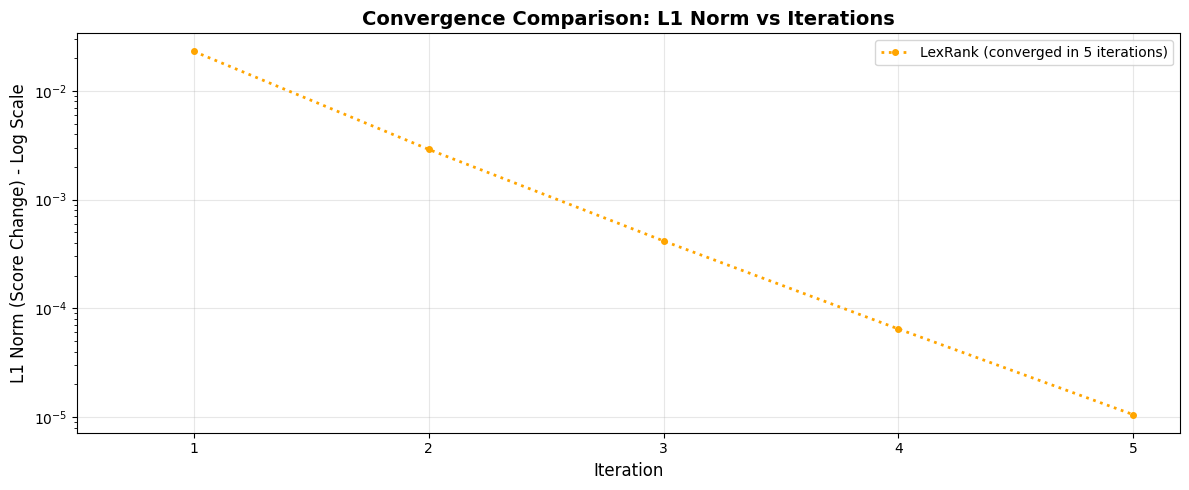

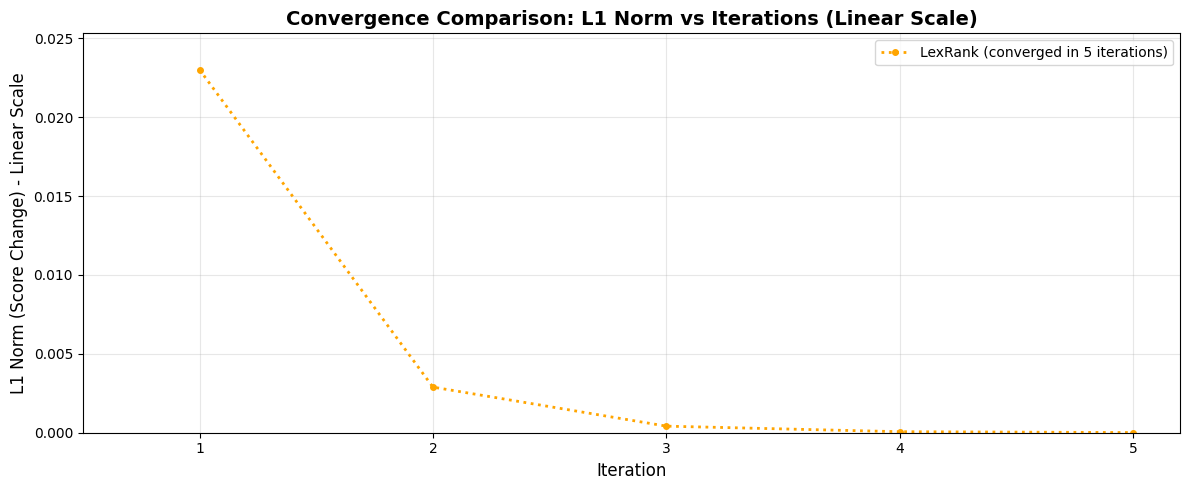

In [21]:
if(ranking_method == 1): 
    rankings = standard_degree_centrality(results)
elif(ranking_method == 2):
    rankings = weighted_centrality(results)
elif(ranking_method == 3):
    rankings = enhanced_weighted_centrality(results)
elif(ranking_method == 4):
    print("statistical")
    rankings = statistical_TextRank(results)
elif(ranking_method == 5):
    rankings = fusion_TextRank(results)
elif(ranking_method == 6):
    rankings = hybrid_TextRank(results)
elif(ranking_method == 7):
    rankings = pagerank(results)
elif(ranking_method == 8):
    rankings = standard_TextRank(results)
else:
    rankings = LexRank(results)

plot_l1_norms_convergence()
plot_l1_norms_linear()

# ‚úÇÔ∏è Sentence Selection

In [22]:
def sentence_selection(rankings, file_results, original_folder, summaries_sizes=sumaries_sizes):
    """
    Generate extractive summaries for each file by selecting top sentences from original files.
    Uses the number of sentences found in the voted folder as the target number of sentences.
    Avoids redundant sentences by checking similarity with already selected sentences.
    
    Args:
        rankings: The output from rank_sentences_by_centrality
        file_results: Original results from process_all_files
        original_folder: Path to folder containing original sentences
        summaries_sizes: Dictionary with filename as key and target sentence count as value
        with_redundancy_reduction: Whether to perform redundancy reduction
        redundancy_threshold: Maximum allowed similarity between sentences in summary (0.0 to 1.0)
        
    Returns:
        Dictionary with filename as key and summary text as value
    """
    summaries = {}
    
    for filename, ranked_sentences in rankings.items():
        # Load original sentences file
        original_file_path = os.path.join(original_folder, filename)
        try:
            with open(original_file_path, 'r', encoding='utf-8') as f:
                original_data = json.load(f)
        except FileNotFoundError:
            print(f"Warning: Original file {filename} not found in {original_folder}")
            continue
        
        # Count total sentences in original file
        total_sentences = sum(len(original_data.get(para, {})) for para in original_data)
        
        # Skip the title if present (assuming title is in paragraph "0" with a single sentence "0")
        has_title = False
        if "0" in original_data and len(original_data["0"]) == 1 and "0" in original_data["0"]:
            total_sentences -= 1
            has_title = True
        
        # Get the target number of sentences from summaries_sizes dictionary
        base_filename = filename
        
        # Check if this file exists in summaries_sizes
        if base_filename not in summaries_sizes:
            print(f"Warning: No target size found for {base_filename} in summaries_sizes")
            # Skip this file by setting an empty summary and continuing to the next file
            summaries[filename] = ""
            continue
            
        # Get the target sentence count from summaries_sizes
        target_sentences = summaries_sizes[base_filename]
        
        # Original graph to get paragraph and sentence indices and TF-ISF vectors
        graph = file_results[filename]['graph']
        vectors = file_results[filename]['vectors']
        
        # Keep track of selected sentences and their TF-ISF vectors
        selected_sentences = []
        selected_vectors = []
        
        # Process ranked sentences in order
        for sent_id, score, *_ in ranked_sentences:
            # Skip once we've reached our target number of sentences
            if len(selected_sentences) >= target_sentences:
                break
                
            # Parse sentence ID to get paragraph and sentence indices
            para_idx, sent_idx = sent_id.split('_')
            
            # Skip title if identified (assuming paragraph 0, sentence 0 is title)
            if has_title and para_idx == "0" and sent_idx == "0":
                continue
                
            # Get the TF-ISF vector for this sentence
            vector_idx = graph.nodes[sent_id]['vector_idx']
            current_vector = vectors[vector_idx]
            
            if with_redundancy_reduction:
                # Check if this sentence is redundant compared to already selected sentences
                is_redundant = False
                for sel_vector in selected_vectors:
                    similarity = cosine_similarity(current_vector, sel_vector)
                    if similarity > redundancy_threshold:
                        is_redundant = True
                        break
            
                # Skip redundant sentences
                if is_redundant:
                    continue
            
            # Extract original sentence from the original data
            try:
                original_text = original_data[para_idx][sent_idx]
                selected_sentences.append((int(para_idx), int(sent_idx), original_text))
                selected_vectors.append(current_vector)
            except KeyError:
                print(f"Warning: Sentence ID {sent_id} not found in original file {filename}")
                continue
        
        # Sort by paragraph index first, then sentence index for proper document flow
        selected_sentences.sort()
        
        # Combine sentences into summary
        summary = ". ".join([text for _, _, text in selected_sentences])
        summaries[filename] = summary
        
        if filename == print_file:
            print(f"\nExtractive summary for {filename} ({len(selected_sentences)} of {total_sentences} sentences, {round(len(selected_sentences)/total_sentences*100, 1)}%):")
            print(f"Target sentences from voted folder: {target_sentences}")
            print(summary)
    
    return summaries

In [23]:
# Path to original sentences
original_folder = "/kaggle/input/graduation-project/original_sentences"
    
summaries = sentence_selection(
    rankings, 
    results, 
    original_folder, 
)


Extractive summary for file13.json (4 of 16 sentences, 25.0%):
Target sentences from voted folder: 4
ŸÅÿßŸÑÿ¥ÿ±ÿßŸÉÿ© ŸáŸä ÿßŸÑÿ™Ÿä ŸäŸÜÿÆÿ±ÿ∑ ÿßŸÑŸÖÿ¨ÿ™ŸÖÿπ ÿ®ŸÉŸÑ ŸÅÿ¶ÿßÿ™Ÿá Ÿàÿ£ÿ¨ŸäÿßŸÑŸá ŸÑÿ®ŸÜÿßÿ¶Ÿáÿß. ŸàÿßŸÑŸÖŸÅŸáŸàŸÖ ÿßŸÑÿ¥ÿßŸÖŸÑ ŸÑŸÑÿßÿµŸÑÿßÿ≠ ŸáŸà ÿßŸÑÿ∞Ÿä ŸÑÿß ŸäŸÇŸäÿØ ŸÜŸÅÿ≥Ÿá ÿ®ÿ¨ÿ≤ÿ¶Ÿäÿ© ÿßŸÑÿ≥Ÿäÿßÿ≥ÿ© ÿπŸÑŸâ ÿßŸáŸÖŸäÿ™Ÿáÿß  ŸÑŸÉŸÜŸá ÿ¨ÿ≥ÿØ ŸÖÿ™ŸÉÿßŸÖŸÑ Ÿäÿ∂ŸÖ ÿßŸÑÿ™ÿπŸÑŸäŸÖ ŸàÿßŸÑŸÇÿ∂ÿßÿ° ŸàÿßŸÑÿßŸÇÿ™ÿµÿßÿØ ŸàÿßŸÑÿ•ÿπŸÑÿßŸÖ. ÿ®ÿßŸÑÿ™ÿ£ŸÉŸäÿØ ŸáŸÜÿßŸÉ ŸÅÿ±ŸÇ  ÿå  ŸàÿßŸÑÿß ŸÖÿß ŸÖÿπŸÜŸâ ÿ∞ŸÑŸÉ ÿßŸÑÿ¥ÿ∫ŸÅ ÿßŸÑÿ∞Ÿâ ÿ®ÿßÿ™ Ÿäÿ®ÿØŸäŸá ÿßŸÑÿ™ŸÑÿßŸÖŸäÿ∞ ŸÑŸÑÿ™ÿπŸÑŸäŸÖ ŸÅŸä ÿßŸÑŸÖÿØÿßÿ±ÿ≥ ÿßŸÑÿ≠ŸÉŸàŸÖŸäÿ©. ÿßŸÜ ŸÖÿ®ÿßÿØÿ±ÿßÿ™ ŸÉÿ´Ÿäÿ±ÿ© ÿ£ÿ∑ŸÑŸÇŸáÿß ÿßŸÑŸÖŸÑŸÉ ÿßÿ±ÿßÿØ ŸÖÿπŸáÿß ÿßŸÜ ÿ™ÿ¥ŸÉŸÑ ŸÜŸÖÿßÿ∞ÿ¨ Ÿäÿ¨ÿ® ÿπŸÑŸâ ÿßŸÑŸÖÿ§ÿ≥ÿ≥ÿßÿ™ ÿßŸÑÿ≠ŸÉŸàŸÖŸäÿ© ŸàÿßŸÑÿßŸáŸÑŸäÿ© ÿßŸÜ ÿ™ŸÇÿ™ŸÅŸä ÿ¢ÿ´ÿßÿ±Ÿáÿß ŸàŸáŸä ÿßŸÑÿ™Ÿä ŸÑÿßŸÖÿ≥ÿ™ ÿπŸÖŸÇ ÿ≠ÿßÿ¨ÿßÿ™ ÿßŸÑŸÖÿ¨ÿ™ŸÖÿπ Ÿàÿ™ÿ∑ŸÑÿπÿßÿ™ ÿßÿ®ŸÜÿßÿ¶Ÿá ÿßŸÑŸâ ÿ≠Ÿäÿßÿ© ÿ™ŸÇŸàŸÖ ÿπŸÑŸâ ÿßŸÑÿßÿ®ÿØÿßÿπ ŸàÿßŸÑŸÖÿ®ÿßÿØÿ±ÿ© Ÿàÿ≠ŸÅÿ≤ ÿßŸÑÿßŸÜÿ™ÿßÿ¨ ÿßŸÜ ŸÜÿπÿ

# ‚öñÔ∏è Evaluation

In [24]:
def evaluate_summaries_with_rouge(generated_summaries, reference_folder):
    """
    Evaluate generated summaries against reference summaries using ROUGE metrics.
    
    Args:
        generated_summaries: Dictionary with filename as key and generated summary as value
        reference_folder: Path to folder containing reference summaries
        
    Returns:
        Dictionary with average ROUGE scores and per-file scores
    """
    # Initialize Rouge calculator
    rouge = Rouge()
    
    # Store all scores
    all_scores = {}
    
    # Store aggregate scores for averaging
    aggregate_scores = {
        'rouge-1': {'f': [], 'p': [], 'r': []},
        'rouge-2': {'f': [], 'p': [], 'r': []},
        'rouge-l': {'f': [], 'p': [], 'r': []}
    }
    
    # Get list of all reference files
    reference_files = os.listdir(reference_folder)

    
    # Evaluate each generated summary against its reference summaries
    for filename, generated_summary in generated_summaries.items():
        # Extract base filename without extension
        base_filename = os.path.splitext(filename)[0]
        
        # Find all reference summaries for this file
        file_refs = [f for f in reference_files if f.startswith(f"{base_filename}_sum")]
        
        if not file_refs:
            print(f"Warning: No reference summaries found for {filename}. Skipping this file.")
            continue
        
        # Load all reference summaries for this file
        valid_reference_summaries = []
        for ref_file in file_refs:
            ref_path = os.path.join(reference_folder, ref_file)
            try:
                with open(ref_path, 'r', encoding='utf-8') as f:
                    ref_content = f.read().strip()
                    # Check if reference summary is empty or only has one sentence
                    if not ref_content:
                        print(f"Warning: Empty reference file {ref_file}. Ignoring this reference.")
                        continue
                    
                    # Count sentences (naive approach - split by period, exclamation mark, or question mark)
                    sentences = re.split(r'[.!?]+', ref_content)
                    sentences = [s.strip() for s in sentences if s.strip()]
                    
                    #if len(sentences) <= 1:
                    #    print(f"Warning: Reference file {ref_file} has only one sentence. Ignoring this reference.")
                    #    continue
                    
                    valid_reference_summaries.append(ref_content)
            except Exception as e:
                print(f"Error reading reference file {ref_file}: {e}")
                continue
        
        if not valid_reference_summaries:
            print(f"Warning: No valid reference summaries for {filename}. Skipping this file.")
            continue
        
        # Calculate ROUGE scores against each reference
        file_scores = {
            'rouge-1': {'f': [], 'p': [], 'r': []},
            'rouge-2': {'f': [], 'p': [], 'r': []},
            'rouge-l': {'f': [], 'p': [], 'r': []}
        }
        
        for ref_summary in valid_reference_summaries:
            try:
                # Make sure generated summary is not empty
                if not generated_summary.strip():
                    print(f"Warning: Empty generated summary for {filename}. Skipping this file.")
                    continue
                    
                # Calculate ROUGE scores
                scores = rouge.get_scores(generated_summary, ref_summary)[0]
                
                # Add scores to file-specific records
                for metric in ['rouge-1', 'rouge-2', 'rouge-l']:
                    for score_type in ['f', 'p', 'r']:
                        file_scores[metric][score_type].append(scores[metric][score_type])
            except Exception as e:
                print(f"Error calculating ROUGE for {filename} with a reference: {e}")
                continue
        
        # Skip this file if no valid scores were calculated
        if not any(file_scores[metric][score_type] for metric in ['rouge-1', 'rouge-2', 'rouge-l'] for score_type in ['f', 'p', 'r']):
            print(f"Warning: Could not calculate any valid ROUGE scores for {filename}. Skipping this file.")
            continue
            
        # Calculate average score across all references for this file
        file_avg_scores = {}
        for metric in ['rouge-1', 'rouge-2', 'rouge-l']:
            file_avg_scores[metric] = {}
            for score_type in ['f', 'p', 'r']:
                if file_scores[metric][score_type]:
                    score_avg = np.mean(file_scores[metric][score_type])
                    file_avg_scores[metric][score_type] = score_avg
                    
                    # Add to aggregate scores for overall average
                    aggregate_scores[metric][score_type].append(score_avg)
                else:
                    file_avg_scores[metric][score_type] = 0.0
        
        # Store file scores
        all_scores[filename] = file_avg_scores
        
        # Print summary for this file with precision and recall
        print(f"\nROUGE scores for {filename}:")
        print(f"  ROUGE-1: F1: {file_avg_scores['rouge-1']['f']:.4f}, Precision: {file_avg_scores['rouge-1']['p']:.4f}, Recall: {file_avg_scores['rouge-1']['r']:.4f}")
        print(f"  ROUGE-2: F1: {file_avg_scores['rouge-2']['f']:.4f}, Precision: {file_avg_scores['rouge-2']['p']:.4f}, Recall: {file_avg_scores['rouge-2']['r']:.4f}")
        print(f"  ROUGE-L: F1: {file_avg_scores['rouge-l']['f']:.4f}, Precision: {file_avg_scores['rouge-l']['p']:.4f}, Recall: {file_avg_scores['rouge-l']['r']:.4f}")
    
    # Calculate overall average scores
    average_scores = {}
    for metric in ['rouge-1', 'rouge-2', 'rouge-l']:
        average_scores[metric] = {}
        for score_type in ['f', 'p', 'r']:
            if aggregate_scores[metric][score_type]:
                average_scores[metric][score_type] = np.mean(aggregate_scores[metric][score_type])
            else:
                average_scores[metric][score_type] = 0.0
    
    # Print number of files used in evaluation
    evaluated_files_count = len(all_scores)
    total_files_count = len(generated_summaries)
    print(f"\nEvaluated {evaluated_files_count} out of {total_files_count} files.")
    
    # Print overall summary with precision and recall
    print("\n" + "="*60)
    print("OVERALL AVERAGE ROUGE SCORES:")
    print(f"  ROUGE-1: F1: {average_scores['rouge-1']['f']:.4f}, Precision: {average_scores['rouge-1']['p']:.4f}, Recall: {average_scores['rouge-1']['r']:.4f}")
    print(f"  ROUGE-2: F1: {average_scores['rouge-2']['f']:.4f}, Precision: {average_scores['rouge-2']['p']:.4f}, Recall: {average_scores['rouge-2']['r']:.4f}")
    print(f"  ROUGE-L: F1: {average_scores['rouge-l']['f']:.4f}, Precision: {average_scores['rouge-l']['p']:.4f}, Recall: {average_scores['rouge-l']['r']:.4f}")
    print("="*60)
    
    return {
        'average': average_scores,
        'per_file': all_scores,
        'evaluated_files_count': evaluated_files_count,
        'total_files_count': total_files_count
    }

# Example usage
if __name__ == "__main__":
    # Reference summaries folder path
    reference_folder = "/kaggle/input/voted-sentences"
    
    # Assuming 'summaries' is the variable containing our generated summaries
    # from the previous extractive summarization step
    evaluation_results = evaluate_summaries_with_rouge(summaries, reference_folder)
    
    # Additional analysis: Find best and worst performing files
    per_file_scores = evaluation_results['per_file']
    
    # Get scores for ROUGE-1
    file_metrics = [(filename, scores['rouge-1']['f'], scores['rouge-1']['p'], scores['rouge-1']['r']) 
                   for filename, scores in per_file_scores.items()]
    
    # Sort by F1 score
    f1_scores = [(filename, f1) for filename, f1, p, r in file_metrics]
    f1_scores.sort(key=lambda x: x[1])
    
    # Sort by precision
    precision_scores = [(filename, p) for filename, _, p, _ in file_metrics]
    precision_scores.sort(key=lambda x: x[1])
    
    # Sort by recall
    recall_scores = [(filename, r) for filename, _, _, r in file_metrics]
    recall_scores.sort(key=lambda x: x[1])
    
    print("\nFILE PERFORMANCE ANALYSIS:")
    
    # Check if we have enough files to show stats
    worst_count = min(3, len(f1_scores))
    best_count = min(3, len(f1_scores))
    
    # F1 Score Analysis
    if worst_count > 0:
        print("\nWorst performing files (ROUGE-1 F1):")
        for filename, score in f1_scores[:worst_count]:  # Bottom 3 or fewer
            print(f"  {filename}: {score:.4f}")
    
    if best_count > 0:        
        print("\nBest performing files (ROUGE-1 F1):")
        for filename, score in f1_scores[-best_count:]:  # Top 3 or fewer
            print(f"  {filename}: {score:.4f}")
    
    # Precision Analysis
    if worst_count > 0:
        print("\nWorst performing files (ROUGE-1 Precision):")
        for filename, score in precision_scores[:worst_count]:  # Bottom 3 or fewer
            print(f"  {filename}: {score:.4f}")
    
    if best_count > 0:        
        print("\nBest performing files (ROUGE-1 Precision):")
        for filename, score in precision_scores[-best_count:]:  # Top 3 or fewer
            print(f"  {filename}: {score:.4f}")
    
    # Recall Analysis
    if worst_count > 0:
        print("\nWorst performing files (ROUGE-1 Recall):")
        for filename, score in recall_scores[:worst_count]:  # Bottom 3 or fewer
            print(f"  {filename}: {score:.4f}")
    
    if best_count > 0:        
        print("\nBest performing files (ROUGE-1 Recall):")
        for filename, score in recall_scores[-best_count:]:  # Top 3 or fewer
            print(f"  {filename}: {score:.4f}")


ROUGE scores for file143.json:
  ROUGE-1: F1: 0.1176, Precision: 0.1594, Recall: 0.0932
  ROUGE-2: F1: 0.0167, Precision: 0.0230, Recall: 0.0131
  ROUGE-L: F1: 0.0856, Precision: 0.1159, Recall: 0.0678

ROUGE scores for file123.json:
  ROUGE-1: F1: 0.8855, Precision: 0.9206, Recall: 0.8529
  ROUGE-2: F1: 0.8571, Precision: 0.8724, Recall: 0.8424
  ROUGE-L: F1: 0.8855, Precision: 0.9206, Recall: 0.8529

ROUGE scores for file129.json:
  ROUGE-1: F1: 0.7686, Precision: 0.8909, Recall: 0.6759
  ROUGE-2: F1: 0.7382, Precision: 0.8603, Recall: 0.6464
  ROUGE-L: F1: 0.7686, Precision: 0.8909, Recall: 0.6759

ROUGE scores for file134.json:
  ROUGE-1: F1: 0.1965, Precision: 0.1717, Recall: 0.2297
  ROUGE-2: F1: 0.0383, Precision: 0.0339, Recall: 0.0440
  ROUGE-L: F1: 0.1850, Precision: 0.1616, Recall: 0.2162

ROUGE scores for file150.json:
  ROUGE-1: F1: 1.0000, Precision: 1.0000, Recall: 1.0000
  ROUGE-2: F1: 1.0000, Precision: 1.0000, Recall: 1.0000
  ROUGE-L: F1: 1.0000, Precision: 1.0000, 